<a href="https://colab.research.google.com/github/lrincon66/Computational_chemistry/blob/main/md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np 
import matplotlib.pyplot as plt

In [46]:
def E_r(xi):
  k = 1.0
  return k*np.power(xi,2)

In [47]:
def dE_r(xi):
  k = 1.0
  return 2.0*k*xi

In [48]:
def E_p(xi):
  k = 1.0
  dE = 0.0
  return k*np.power(1.0-xi,2) + dE

In [49]:
def dE_p(xi):
  k = 1.0
  return -2.0*k*(1.0-xi)

In [50]:
def E(xi):
  E_rp = 0.05
  return 0.50*(E_r(xi)+E_p(xi)-np.sqrt(np.power(E_r(xi)-E_p(xi),2)+4.0*np.power(E_rp,2)))

In [51]:
def dE(xi):
  E_rp = 0.05
  return 0.5*(dE_r(xi)+dE_p(xi)-((E_r(xi)-E_p(xi)))*((dE_r(xi)-dE_p(xi))/np.sqrt(np.power(E_r(xi)-E_p(xi),2)+4.0*np.power(E_rp,2))))

In [52]:
def g(x,x0,sigma):
  return (1.0/(sigma*np.sqrt(2.0*np.pi)))*np.exp(-0.5*(np.power(x-x0,2)/np.power(sigma,2)))

In [53]:
def dg(x,x0,sigma):
  return -g(x,x0,sigma)*((x-x0)/np.power(sigma,2))

In [54]:
def bias(x,x0):
  c0 = 0.0010
  sigma = 0.01
  sum_bias = 0.0
  for i in range(len(x0)):
    sum_bias = sum_bias + c0*g(x,x0[i],sigma)
  return sum_bias


In [55]:
def dbias(x,x0):
  c0 = 0.0010
  sigma = 0.01
  sum_dbias = 0.0
  for i in range(len(x0)):
    sum_dbias = sum_dbias + c0*dg(x,x0[i],sigma)
  return sum_dbias


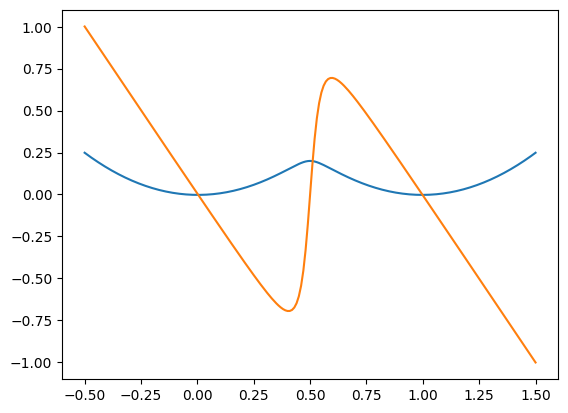

In [56]:
xi = []
ene = []
dene = []
for i in range(201):
  xi.append(-0.5+0.01*i)
  ene.append(E(xi[i]))
  dene.append(-dE(xi[i]))

plt.plot(xi,ene)
plt.plot(xi,dene)
plt.show()

In [66]:
t = []
x = []
ek = []
ep = []
et = []
dt = 0.0001
t.append(0.0)
x.append(0.0)
xx = 0.00001
v = -xx/dt
ek.append(0.5*np.power(v,2))
ep.append(E(0.0))
et.append(ek[0]+ep[0])
for i in range(5000):
  t.append(t[i] + dt)
  x.append(2.0*x[i] - xx - (dE(x[i])+dbias(x[i],x))*np.power(dt,2))
  xx = x[i]
  v = (x[i+1]-x[i])/dt
  ek.append(0.5*np.power(v,2))
  ep.append(E(x[i+1])+bias(x[i],x))
  et.append(ek[i+1]+ep[i+1])


KeyboardInterrupt: ignored

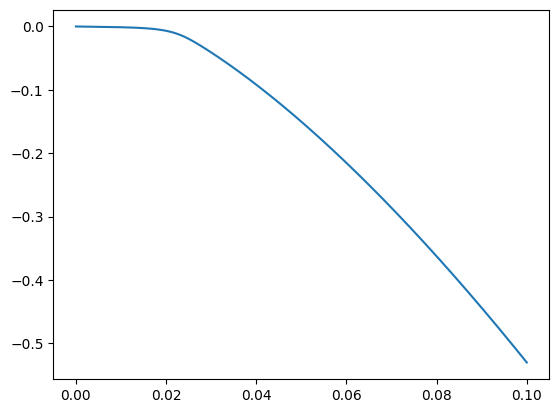

In [63]:
plt.plot(t,x)
plt.show()

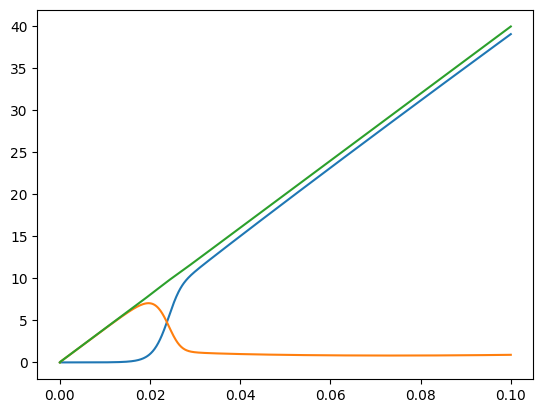

In [64]:
plt.plot(t,ek)
plt.plot(t,ep)
plt.plot(t,et)
plt.show()